In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Chargement des données
df = pd.read_csv("basketball_players.csv")
# df.sample(5)
df

,player_id,last_name,first_name,season_id,conference,league_id,games_played,minutes,points,o_rebounds,...,steals,blocks,turnovers,personal_fouls,fg_attempted,fg_made,ft_attempted,ft_made,three_attempted,three_made
0,abdulka01,Abdul-Jabbar,Kareem,1978,West,NBA,1,28,11.0,NaN,...,NaN,NaN,NaN,NaN,12.0,5.0,2.0,1.0,NaN,NaN
1,abdulka01,Abdul-Jabbar,Kareem,1969,East,NBA,1,18,10.0,NaN,...,NaN,NaN,NaN,NaN,8.0,4.0,2.0,2.0,NaN,NaN
2,abdulka01,Abdul-Jabbar,Kareem,1988,West,NBA,1,13,4.0,NaN,...,NaN,NaN,NaN,NaN,6.0,1.0,2.0,2.0,NaN,NaN
3,abdulka01,Abdul-Jabbar,Kareem,1987,West,NBA,1,14,10.0,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,2.0,2.0,NaN,NaN
4,abdulka01,Abdul-Jabbar,Kareem,1986,West,NBA,1,27,10.0,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,yardlge01,Yardley,George,1956,West,NBA,1,25,9.0,NaN,...,NaN,NaN,NaN,NaN,10.0,4.0,1.0,1.0,NaN,NaN
1605,yardlge01,Yardley,George,1955,West,NBA,1,19,8.0,NaN,...,NaN,NaN,NaN,NaN,7.0,3.0,3.0,2.0,NaN,NaN
1606,yardlge01,Yardley,George,1954,West,NBA,1,22,11.0,NaN,...,NaN,NaN,NaN,NaN,11.0,4.0,4.0,3.0,NaN,NaN
1607,yardlge01,Yardley,George,1959,East,NBA,1,16,11.0,NaN,...,NaN,NaN,NaN,NaN,9.0,5.0,2.0,1.0,NaN,NaN


In [4]:
df.describe()

,season_id,games_played,minutes,points,o_rebounds,d_rebounds,rebounds,assists,steals,blocks,turnovers,personal_fouls,fg_attempted,fg_made,ft_attempted,ft_made,three_attempted,three_made
count,1609.00000,1609.0,1609.000000,1562.000000,493.000000,493.000000,1562.000000,1562.000000,398.000000,398.000000,493.000000,540.000000,1562.000000,1562.000000,1562.000000,1562.000000,540.000000,566.000000
mean,1978.95463,1.0,23.103170,10.749680,1.567951,3.129817,4.933419,2.510883,1.128141,0.459799,1.697769,1.648148,9.338668,4.322663,2.615877,1.898848,1.325926,0.416961
std,16.20411,0.0,15.221598,6.962659,1.725569,2.599911,3.971961,2.632560,1.268158,0.864725,1.480200,1.435792,4.893343,2.879090,2.889102,2.243935,2.055193,0.909728
min,1950.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1967.00000,1.0,16.000000,6.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.00000,1.0,21.000000,10.000000,1.000000,3.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,9.000000,4.000000,2.000000,1.000000,0.000000,0.000000
75%,1992.00000,1.0,27.000000,15.000000,2.000000,4.000000,7.000000,3.000000,2.000000,1.000000,2.000000,2.000000,12.000000,6.000000,4.000000,3.000000,2.000000,0.000000
max,2009.00000,1.0,99.000000,42.000000,13.000000,19.000000,27.000000,22.000000,6.000000,5.000000,8.000000,8.000000,27.000000,17.000000,16.000000,12.000000,11.000000,6.000000


In [6]:
(df.isna().mean()*100).sort_values(ascending=False)
# (df.isna().mean() * 100).sort_values(ascending=False)
# df.isna().sum()

steals             75.264139
blocks             75.264139
turnovers          69.359851
o_rebounds         69.359851
d_rebounds         69.359851
three_attempted    66.438782
personal_fouls     66.438782
three_made         64.822871
ft_made             2.921069
ft_attempted        2.921069
fg_made             2.921069
fg_attempted        2.921069
rebounds            2.921069
assists             2.921069
points              2.921069
last_name           0.000000
minutes             0.000000
games_played        0.000000
league_id           0.000000
conference          0.000000
season_id           0.000000
first_name          0.000000
player_id           0.000000
dtype: float64

In [8]:
# cols = ['minutes', 'points', 'rebounds', 'assists', 'fg_attempted', 'fg_made', 'ft_attempted', 'ft_made']
# df_kmeans = df[cols].dropna()
df_kmeans.sample(5)
# df_kmeans

,minutes,points,rebounds,assists,fg_attempted,fg_made,ft_attempted,ft_made
1445,24,12.0,6.0,1.0,13.0,6.0,0.0,0.0
275,18,7.0,3.0,3.0,8.0,3.0,1.0,1.0
908,20,4.0,4.0,0.0,8.0,2.0,0.0,0.0
438,17,10.0,4.0,0.0,7.0,4.0,5.0,2.0
882,35,25.0,10.0,1.0,19.0,12.0,1.0,1.0


In [9]:
#Apprentissage avec l'algorithme K-Mean
km_5 = KMeans(n_clusters=5, random_state=42)
km_5.fit(df_kmeans)

KMeans(n_clusters=5, random_state=42)

In [10]:
km_5.labels_

array([4, 1, 3, ..., 1, 1, 2])

In [11]:
#Predictions
predictions_kmeans = km_5.predict(df_kmeans)
predictions_kmeans

array([4, 1, 3, ..., 1, 1, 2])

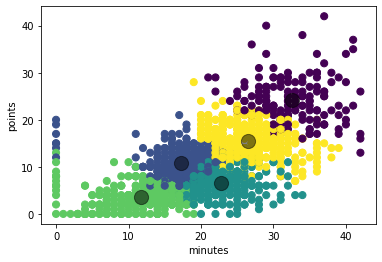

In [14]:
# Affichage de la clusterisation
plt.scatter(df_kmeans.minutes, df_kmeans.points, c=predictions_kmeans, s=50, cmap='viridis')
plt.xlabel("minutes")
plt.ylabel("points")
#Affichage des centroïdes
centers = km_5.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

*** For n_clusters = 2, inertia is 151099.70204354858 ***

*** For n_clusters = 3, inertia is 118369.68287792488 ***

*** For n_clusters = 4, inertia is 103424.182990339 ***

*** For n_clusters = 5, inertia is 95086.76241815728 ***

*** For n_clusters = 6, inertia is 88169.0525532205 ***

*** For n_clusters = 7, inertia is 82743.2063140999 ***

*** For n_clusters = 8, inertia is 78543.30819900478 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

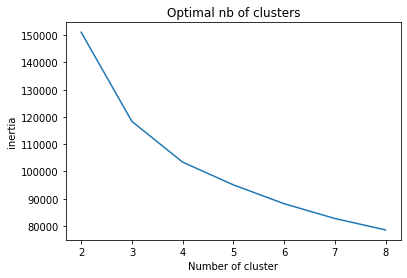

In [15]:
#Elbow method
inertia = {}
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_kmeans)
    inertia[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

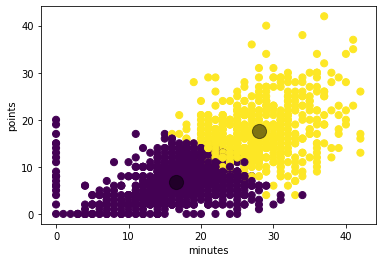

In [19]:
km_2=KMeans(n_clusters=2, random_state=42)
km_2.fit(df_kmeans)
predictions_kmeans = km_2.predict(df_kmeans)

#Affichage de la clusterisation
plt.scatter(df_kmeans.minutes, df_kmeans.points, c=predictions_kmeans, s=50, cmap='viridis')
plt.xlabel("minutes")
plt.ylabel("points")
#Affichage des centroïdes
centers = km_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

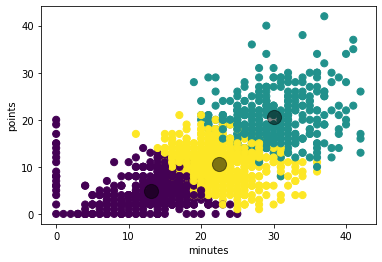

In [30]:
km_3=KMeans(n_clusters=3, random_state=42)
km_3.fit(df_kmeans)
predictions_kmeans = km_3.predict(df_kmeans)

#Affichage de la clusterisation
plt.scatter(df_kmeans.minutes, df_kmeans.points, c=predictions_kmeans, s=50, cmap='viridis')
plt.xlabel("minutes")
plt.ylabel("points")
#Affichage des centroïdes
centers = km_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
